In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

In [3]:
# 그래프에 한글 사용 설정
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/NGULIM.ttf'  # 폰트가 설치되어 있는 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
import warnings
# 모든 경고 무시
warnings.filterwarnings('ignore')

In [5]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
# 그룹화 및 평균 계산
table = tips.groupby(["day", "time"])[["tip", "total_bill"]].mean()
table

tip  total_bill
day  time                        
Thur Lunch   2.767705   17.664754
     Dinner  3.000000   18.780000
Fri  Lunch   2.382857   12.845714
     Dinner  2.940000   19.663333
Sat  Lunch        NaN         NaN
     Dinner  2.993103   20.441379
Sun  Lunch        NaN         NaN
     Dinner  3.255132   21.410000

In [11]:
table = tips.groupby(['day', 'time']).agg({'tip' : 'mean', 'total_bill' : 'sum'})
table

tip  total_bill
day  time                        
Thur Lunch   2.767705     1077.55
     Dinner  3.000000       18.78
Fri  Lunch   2.382857       89.92
     Dinner  2.940000      235.96
Sat  Lunch        NaN        0.00
     Dinner  2.993103     1778.40
Sun  Lunch        NaN        0.00
     Dinner  3.255132     1627.16

In [ ]:
# 결측치 0으로 채우기, 소숫점 첫째자리
table.fillna(0).round(1)

tip  total_bill
day  time                   
Thur Lunch   2.8      1077.6
     Dinner  3.0        18.8
Fri  Lunch   2.4        89.9
     Dinner  2.9       236.0
Sat  Lunch   0.0         0.0
     Dinner  3.0      1778.4
Sun  Lunch   0.0         0.0
     Dinner  3.3      1627.2

In [ ]:
table.fillna(0).astype(int).style.background_gradient()

[Text(0.5, 1.0, '흡연별 tip')]

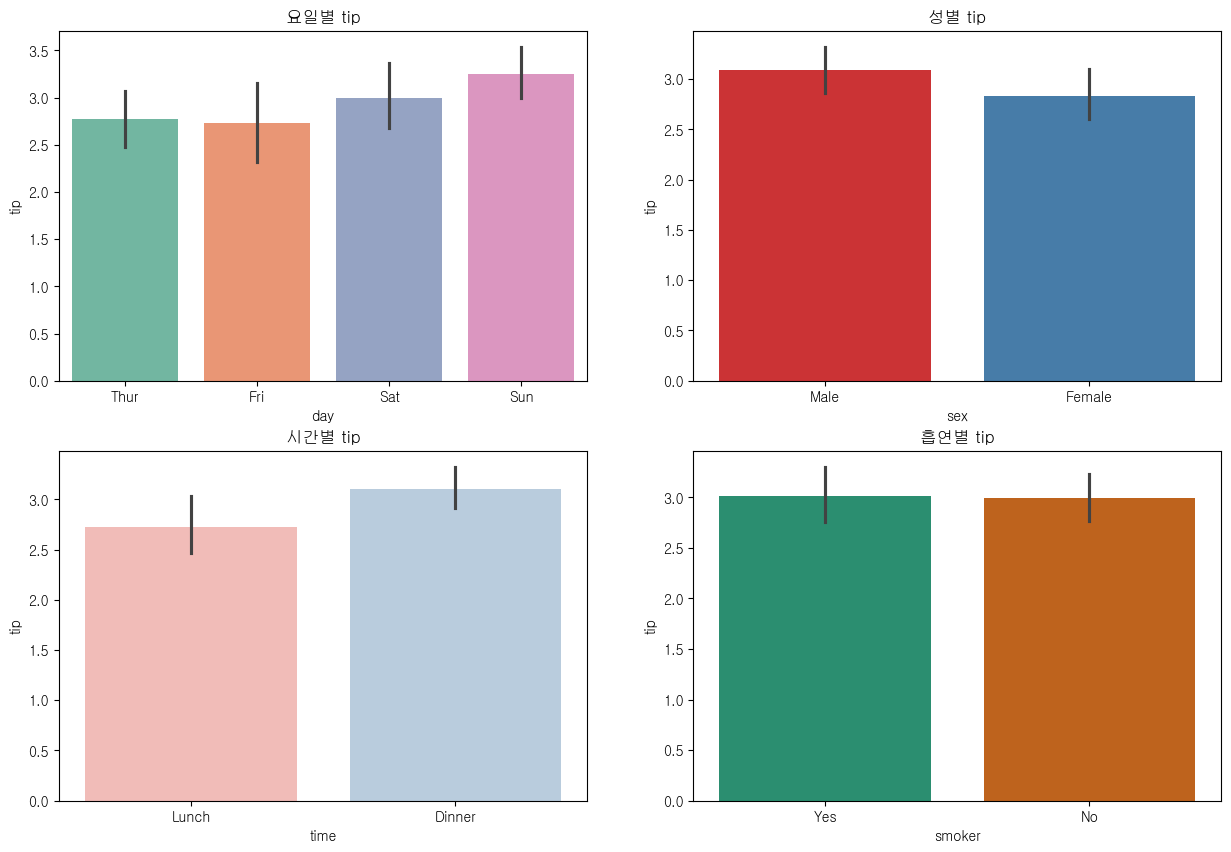

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15, 10)
sns.barplot(data = tips, x="day", y="tip", ax=ax1, palette="Set2")
sns.barplot(data = tips, x="sex", y="tip", ax=ax2, palette="Set1")
sns.barplot(data = tips, x="time", y="tip", ax=ax3, palette="Pastel1")
sns.barplot(data = tips, x="smoker", y="tip", ax=ax4, palette="Dark2")

ax1.set(title="요일별 tip")
ax2.set(title="성별 tip")  
ax3.set(title="시간별 tip")
ax4.set(title="흡연별 tip")

[Text(0.5, 1.0, '흡연별 tip')]

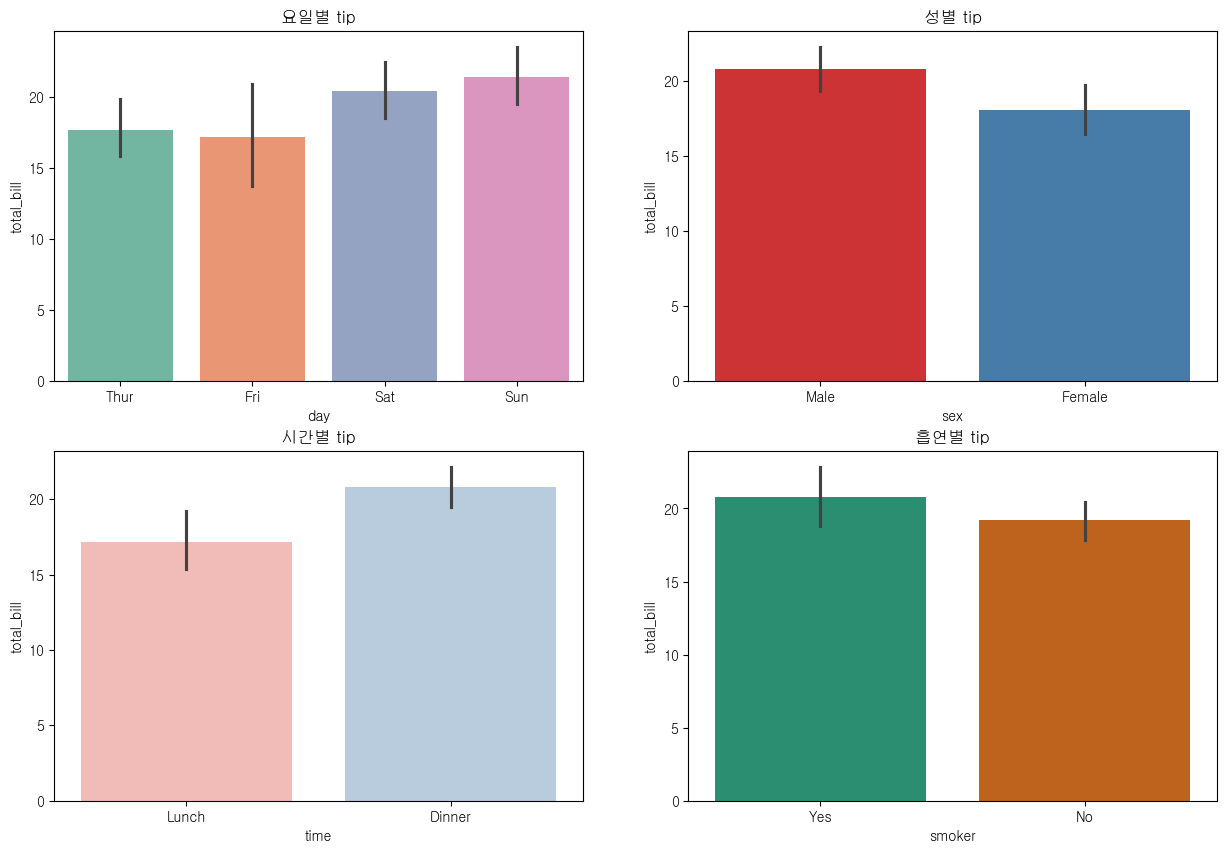

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(15, 10)
sns.barplot(data = tips, x="day", y="total_bill", ax=ax1, palette="Set2")
sns.barplot(data = tips, x="sex", y="total_bill", ax=ax2, palette="Set1")
sns.barplot(data = tips, x="time", y="total_bill", ax=ax3, palette="Pastel1")
sns.barplot(data = tips, x="smoker", y="total_bill", ax=ax4, palette="Dark2")

ax1.set(title="요일별 tip")
ax2.set(title="성별 tip")  
ax3.set(title="시간별 tip")
ax4.set(title="흡연별 tip")